In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)


In [23]:
full_train=pd.read_csv('/Users/vinayswamy/Downloads/diabetes.csv')
full_train.rename(columns={'Outcome':'target'}, inplace=True)
full_train.target.value_counts()

0    500
1    268
Name: target, dtype: int64

In [3]:
X=full_train.drop(columns=['target'])
Y=full_train['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [5]:
Y_pred=model.predict(X_test)
conf_mat = metrics.confusion_matrix(y_true=Y_test, y_pred=Y_pred)
print('Confusion matrix: {}\n'.format('LogReg'), conf_mat)

Confusion matrix: LogReg
 [[90  9]
 [25 30]]


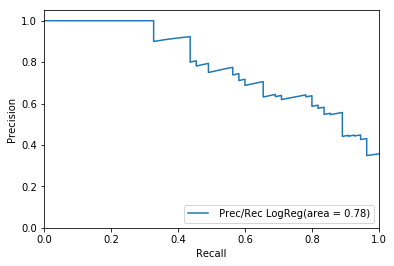

In [6]:
plt.figure()

Y_pred=model.predict(X_test)
Y_scores= model.predict_proba(X_test)[:,1]
pre, rec, thresholds = metrics.precision_recall_curve(Y_test, Y_scores)
auc = metrics.average_precision_score(Y_test, Y_scores)
plt.plot(rec, pre, label=' Prec/Rec {}(area = %0.2f)'.format('LogReg') % ( auc))
plt.plot([1, 1], [1, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('')
plt.legend(loc="lower right")
plt.show()

In [33]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)
pipe = make_pipeline(
    SMOTE(),
    LogisticRegression()
)


#weights = np.linspace(0.005, 0.05, 10)
#weights=['minority','not minority']
weights=[.7,.6]

gsc = GridSearchCV(
    estimator=pipe,
    param_grid={
        #'smote__ratio': [{0: int(num_neg), 1: int(num_neg * w) } for w in weights]
        'smote__sampling_strategy': weights
    },
    scoring='f1',
    cv=3
)
grid_result = gsc.fit(X, Y)

print("Best parameters : %s" % grid_result.best_params_)

Best parameters : {'smote__sampling_strategy': 0.6}


In [ ]:
weights

In [ ]:
X.shape


In [8]:
Y.shape

(768,)

In [9]:
Y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: target, Length: 768, dtype: int64

array([  1.        ,  30.66666667,  60.33333333,  90.        ,
       119.66666667, 149.33333333, 179.        , 208.66666667,
       238.33333333, 268.        ])

In [72]:
import imblearn
print(imblearn.__version__)

0.3.3


In [19]:
weights = np.linspace(0.005, 0.05, 10)
type(weights[0])

numpy.float64

In [20]:
type(.006)

float